# Physics 453: Finite Square Well and Transfer Matrix

### Finite Square Well, Fourier Transform, and Expectation Values

In the double finite well notebook, we learned about how to use the Shooting Method to numerically find energy eigenstates for a double finite square well.  In the infinite square well notebook, there was an example of how to perform Fourier transforms in Python.  Now we are going to combine these skills to calculate some observables.

Use the shooting method to find the two lowest energy eigenstates of a (single) finite square well with a depth of $V_0=-2$ and a width of $a=3$.  (Feel free to draw from the in class code.) Once you have the wavefunctions for the ground state and the first excited state, plot them. (You just need a static plot, nothing to animate here.)  

Then calculate $\Delta x$ and $\Delta p$ numerically, where
$$\Delta \hat{O} = \sqrt{<\hat{O}^2>-<\hat{O}>^2}$$
Perform the calculation of $\Delta p$ by first fourier transforming the wavefunctions into momentum space.  Is the uncertainty principle obeyed for each state?

Remember that our work is done in a discrete space, so integrals become sums.  For example, in real space
$$ <\hat{x}>=\int \psi^*(x)x \psi(x)dx \approx \sum_i \psi^*(x_i)x_i\psi(x_i)\delta x$$

#### Make sure you use comments and markdown cells to explain/document your code!  In all cases, assume $\hbar=m=1$.

Norm Psi_0= 1.0
Energy_0= -1.6805031159892678
Norm Psi_1= 1.0
Energy_1= -0.8209590911865234


<IPython.core.display.Javascript object>


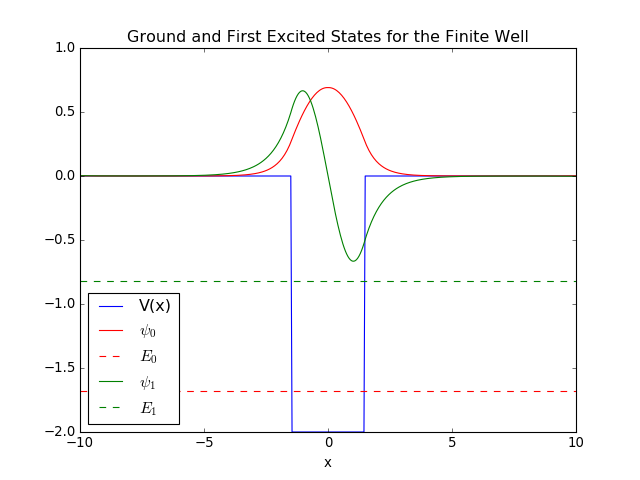

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib.widgets import Slider, Button, RadioButtons
import numpy
import math

def Potential(x, a, b, V0):
    V=numpy.zeros(len(x))
    V[(abs(x)>=b/2.) & (abs(x)<b/2.+a)] = -V0
    return V

def norm(dx, psi):
    return dx*numpy.dot(psi,psi)

def normalize(dx, psi):
    return psi/numpy.sqrt(norm(dx,psi))

def forward_shooting(V, x, dx, f0, df0, Emin, Emax, acc):
    """
    V - array with the values of the potential at the points in x
    x - the grid points
    dx - the spacing of the grid
    f0 - value of the funtion at x=0
    df0 - value of the derivative of the function at x=0
    Emin, Emax - the energy window in which to search for physical solutions
    acc - find the energy to within this accuracy, smaller accuracy will require more iterations
    """
    Edelta = 1.
    E = Emin
    psi = numpy.zeros(len(x))
    psi[0]=f0
    max_steps = 500
    count=0
    
    #Find the energy corresponding to a physical state via bisection
    #Keep iterating until we have the energy to within acc, or until we take max_steps iterations
    while Edelta > acc and count < max_steps:
        count+=1
        #Step through the grid points and find the value of the wavefunction from the shooting method
        for i, x_ in enumerate(x[0:-1]):
            if i==0:
                psi[i+1] = psi[i] + dx*df0
            else:
                psi[i+1] = -psi[i-1] + 2.*( 1 + dx**2 * (V[i] - E) )*psi[i]
                
            #This is the tricky part! If the wavefunction is blowing up,
            #we use bisection to change the energy and search for the physical energy.
            #The details of how to pick the next energy depend on number of nodes the wavefunction has.  
            #This will work for n=0,1,4,5,8,9...
            if(psi[i] > 25):
                Emin=E
                E = Emin + (Emax-Emin)/2.
                break
            elif(psi[i] < -25):
                Emax=E
                E=Emax-(Emax-Emin)/2.
                break
        Edelta = (Emax-Emin)
    return (psi, E)
    
def acquire_double_well_states(a, b, V0, x, dx, acc, L_plot):
    V = Potential(x, a, b, V0)
    
    #Get the ground state (symmetric, psi'(x=0)=0)
    (psi_0, energy_0) = forward_shooting(V, x, dx, 1, 0, -V0, 0, acc)
    
    #Get the first excited state (antisymmetric, psi(x=0)=0)
    (psi_1, energy_1) = forward_shooting(V, x, dx, 0, 1, -V0, 0, acc)
    psi_0[x>L_plot]=0
    psi_1[x>L_plot]=0

    #Use symmetry to get the other half of the wavefunction
    space = numpy.zeros(2*len(x))
    space[0:len(x)]=-x[::-1]
    space[len(x):2*len(x)]=x

    Psi_0 = numpy.zeros(len(space))
    Psi_0[0:len(x)]=psi_0[::-1]
    Psi_0[len(x):2*len(x)]=psi_0
    Psi_0=normalize(dx, Psi_0)

    Psi_1 = numpy.zeros(len(space))
    Psi_1[0:len(x)]=psi_1[::-1]
    Psi_1[len(x):2*len(x)]=-psi_1
    Psi_1=normalize(dx, Psi_1)
    
    return (space, Psi_0, energy_0, Psi_1, energy_1)
    
a=1.5
b=0
V0=2
dx=0.05
acc=1e-10
L=10*(b+a)
L_plot=10
x=numpy.linspace(0,L,L/dx+1,True)

(space, Psi_0, energy_0, Psi_1, energy_1) = acquire_double_well_states(a, 0, V0, x, dx, acc, L_plot)

print("Norm Psi_0=",norm(dx, Psi_0))
print("Energy_0=", energy_0)
print("Norm Psi_1=",norm(dx, Psi_1))
print("Energy_1=", energy_1)

plt.subplots()
plt.plot(space, Potential(space, a, b, V0), label="V(x)")

plt.plot(space, Psi_0, 'r',label="$\psi_0$")
plt.plot([-L_plot,L_plot], [energy_0,energy_0],'r--',label="$E_0$")
plt.plot(space, Psi_1, 'g',label="$\psi_1$")
plt.plot([-L_plot,L_plot], [energy_1,energy_1],'g--',label="$E_1$")

plt.xlim([-L_plot,L_plot])
plt.ylim([-2,1])
plt.legend(loc=3)
plt.title('Ground and First Excited States for the Finite Well')
plt.xlabel('x')
plt.show()

norm =  (1+0j)
exp_p= -3.10862464689e-06
exp_p2= 1.56508679529
var_p= 1.25103429021
exp_x= 8.881784197e-17
exp_x2= 1.5188113572
var_x= 1.232400648
var_x*var_p= 1.54177546993


<IPython.core.display.Javascript object>


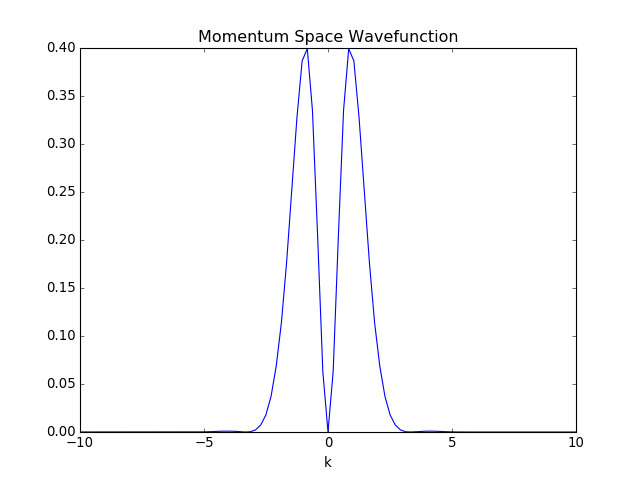

In [2]:
N=len(space)
k0 = -numpy.pi/dx
dk = 2*numpy.pi/(N*dx)
k = k0+dk*numpy.arange(0, N, 1)

#Which state should we check?
psi_new=Psi_1

#Perform the Fourier transform
Psi_0_k = numpy.fft.fft(psi_new)
Psi_0_k = numpy.fft.fftshift(Psi_0_k)
Psi_0_k = Psi_0_k / numpy.sqrt((dk*numpy.sum(Psi_0_k*numpy.conjugate(Psi_0_k))))

print("norm = ", numpy.sum(numpy.conjugate(Psi_0_k)*Psi_0_k)*dk)

#Calculate Expectation values
exp_p =  (numpy.sum(numpy.conjugate(Psi_0_k)*k*Psi_0_k)*dk).real
exp_p2 =  (numpy.sum(numpy.conjugate(Psi_0_k)*k*k*Psi_0_k)*dk).real
var_p = numpy.sqrt(exp_p2-exp_p**2)

exp_x =  (numpy.sum(numpy.conjugate(psi_new)*space*psi_new)*dx).real
exp_x2 =  (numpy.sum(numpy.conjugate(psi_new)*space*space*psi_new)*dx).real
var_x = numpy.sqrt(exp_x2-exp_x**2)

print("exp_p=",exp_p)
print("exp_p2=",exp_p2)
print("var_p=", var_p)

print("exp_x=",exp_x)
print("exp_x2=",exp_x2)
print("var_x=", var_x)

print("var_x*var_p=", var_p*var_x)

plt.figure()
plt.plot(k, (numpy.conjugate(Psi_0_k)*Psi_0_k).real)
plt.xlim([-10,10])
plt.title('Momentum Space Wavefunction')
plt.xlabel('k')
plt.show()

### CHALLENGE PROBLEM (EXTRA CREDIT)

In the written part of this homework, you learned how to calculate the transmission through a single finite, rectangular barrier by solving a system of equations derived from boundary conditions. A more advanced (and much more powerful) way of performing these sorts of calculations is the *transfer matrix*. Use the references below to learn about this method, and then use it to numerically compute the transmission coefficient as a function of energy for a *double* finite, rectangular barrier.  Assume the barriers have a height of $V_0=2$, a width of $a=1$, and are separated by $b=3$.  Make a plot of the transmission coefficient versus energy, and interpret your findings.

Hint: The transfer matrix consists of a discontinuity matrix and a propagation matrix.  Both depend on momentum, so you'll probably want to write functions that take the momentum as an argument and return the needed matrices.

For some help understanding the transfer matrix method, check out this [paper](https://facultystaff.richmond.edu/~ggilfoyl/qm/alphadecaypaper.pdf), and also take a look at Problem 2.53 in Griffiths.

Also, here is some code demonstrating how you use [matrices](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html) in Python with NumPy.

In [3]:
M_test = numpy.matrix( [[2,2], [1,-1]] )    #Creating a matrix, be careful with brackets!
x_test = numpy.matrix( [[1], [-1]] )        #Vectors are also represented with matrices, they just have only one row or column
M_test[0,1]=-5          #Accessing/changing particular elements of a matrix
print("M_test=\n",M_test)
print("x_test=\n",x_test)
print("M_test*x_test=\n",M_test*x_test)
print("x_test.T*M_test*x_test=\n",x_test.T*M_test*x_test)  #x_test.T = the transpose of x_test, gives us a row vector

M_test=
 [[ 2 -5]
 [ 1 -1]]
x_test=
 [[ 1]
 [-1]]
M_test*x_test=
 [[7]
 [2]]
x_test.T*M_test*x_test=
 [[5]]


In [4]:
hbar=1
m=1
V0=2
a=1
b=3

def k1(E):
    return numpy.sqrt(2*m*E)/hbar

def k2(E):
    if(E>V0):
        return numpy.sqrt(2*m*abs(E-V0))/hbar
    else:
        return 1j*numpy.sqrt(2*m*abs(E-V0))/hbar

def transfer_matrix(x0, a, E):
    #Q shifts us to the start of each barrier
    Q = numpy.matrix( [[numpy.exp(-1j*k1(E)*x0), 0], [0, numpy.exp(1j*k1(E)*x0)]] )
    
    #Then we get the transfer matrix for that barrier, in the frame where it begins at x'=0
    p1 = numpy.matrix( [[numpy.exp(1j*k1(E)*a), 0], [0, numpy.exp(-1j*k1(E)*a)]] )
    d21 = 0.5 * numpy.matrix( [[ 1+ k1(E)/k2(E), 1-k1(E)/k2(E)], [1-k1(E)/k2(E), 1+ k1(E)/k2(E)]] )
    p2 = numpy.matrix( [[numpy.exp(-1j*k2(E)*a), 0], [0, numpy.exp(1j*k2(E)*a)]] )
    d12 = 0.5 * numpy.matrix( [[ 1+ k2(E)/k1(E), 1-k2(E)/k1(E)], [1-k2(E)/k1(E), 1+ k2(E)/k1(E)]] )
    
    return Q*d12*p2*d21*p1*numpy.conjugate(Q)

<IPython.core.display.Javascript object>


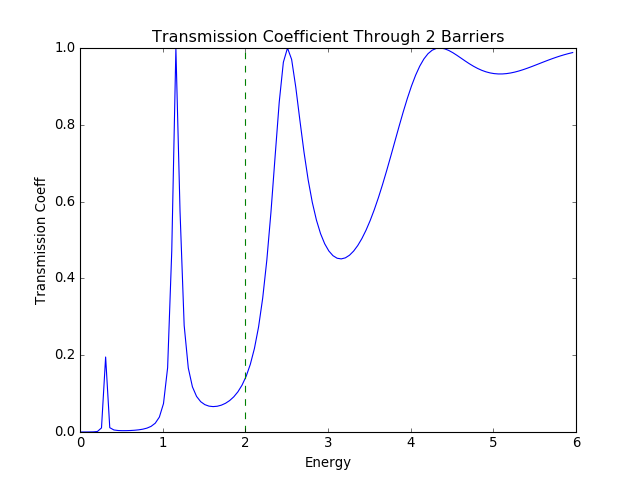

In [5]:
energies = numpy.arange(0.01, 3*V0, 0.05)

transmission = []

for e in energies:
    t = transfer_matrix(0, a, e)*transfer_matrix(a+b, a, e)
    trans = t[0,0]
    transmission.append(1./(trans*numpy.conjugate(trans)).real)
    
plt.figure()
plt.plot(energies, transmission)
plt.plot([V0,V0],[0,1],'--')
plt.title("Transmission Coefficient Through 2 Barriers")
plt.xlabel('Energy')
plt.ylabel('Transmission Coeff')
plt.show()